In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/399300-2005-2019-TT-PARAMTEST-20190518221407.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['BUY_N', 'SELL_N', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN_ALGO'] > md]
# df
md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['WINRATE_YEARLY'] > md]
df

heat_df = df.pivot(index='BUY_N', columns='SELL_N', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

240

,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,1,2436,9.018116,2.872156,-0.539407,-0.724579,0.548995,0.466667,0.185183
1,1,0,2436,9.018116,2.872156,-0.539407,-0.724579,0.548995,0.466667,0.185183
2,1,3,1203,10.402292,2.872156,-0.534631,-0.724579,0.602187,0.600000,0.196545
3,1,2,1584,3.207846,2.872156,-0.666881,-0.724579,0.587444,0.400000,0.111758
4,1,4,925,26.338504,2.872156,-0.371854,-0.724579,0.631291,0.666667,0.276232


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000
mean,15.50000,3.500000,545.458333,28.780890,3.219344,-0.447930,-7.245794e-01,0.595237,0.636111,0.269023
std,8.67353,2.296076,307.506027,17.127959,0.204787,0.089499,4.042479e-15,0.022290,0.089586,0.062246
min,1.00000,0.000000,281.000000,1.141136,2.869227,-0.679619,-7.245794e-01,0.531915,0.400000,0.057771
25%,8.00000,1.750000,359.750000,15.781513,3.036867,-0.508464,-7.245794e-01,0.581325,0.600000,0.233123
50%,15.50000,3.500000,459.000000,24.509249,3.197939,-0.446133,-7.245794e-01,0.597812,0.666667,0.271762
75%,23.00000,5.250000,614.250000,40.576987,3.403040,-0.386558,-7.245794e-01,0.611383,0.683333,0.317972
max,30.00000,7.000000,2436.000000,75.763707,3.543274,-0.261407,-7.245794e-01,0.652381,0.866667,0.378724


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
82,11,2,564,54.854978,3.153014,-0.336997,-0.724579,0.574240,0.800000,0.346431
88,12,0,641,61.062126,3.186832,-0.310253,-0.724579,0.567610,0.733333,0.357085
89,12,1,641,61.062126,3.186832,-0.310253,-0.724579,0.567610,0.733333,0.357085
96,13,0,612,75.763707,3.141598,-0.303983,-0.724579,0.591433,0.733333,0.378724
97,13,1,612,75.763707,3.141598,-0.303983,-0.724579,0.591433,0.733333,0.378724
98,13,2,534,67.158625,3.141598,-0.338785,-0.724579,0.603025,0.666667,0.366649
131,17,3,427,67.327980,3.292665,-0.319512,-0.724579,0.604215,0.666667,0.367402
132,17,5,355,57.076590,3.292665,-0.392148,-0.724579,0.594366,0.666667,0.351035
135,17,6,347,61.220988,3.292665,-0.380068,-0.724579,0.613833,0.733333,0.357951
146,19,2,416,62.092741,3.319233,-0.316978,-0.724579,0.598063,0.666667,0.359597


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
47,6,6,583,14.577148,3.003646,-0.587290,-0.724579,0.590674,0.800000,0.224751
82,11,2,564,54.854978,3.153014,-0.336997,-0.724579,0.574240,0.800000,0.346431
83,11,3,506,52.964469,3.153014,-0.365717,-0.724579,0.573705,0.800000,0.343007
85,11,4,458,42.876687,3.153014,-0.332376,-0.724579,0.590810,0.800000,0.322613
90,12,3,515,44.818403,3.186832,-0.321339,-0.724579,0.587891,0.866667,0.326965
99,13,3,500,46.727303,3.141598,-0.336682,-0.724579,0.602823,0.800000,0.331089
114,15,2,475,51.240740,3.131738,-0.342671,-0.724579,0.602972,0.800000,0.340248
115,15,3,444,46.945591,3.131738,-0.369686,-0.724579,0.595455,0.800000,0.331762
116,15,5,365,36.909488,3.131738,-0.422531,-0.724579,0.612637,0.800000,0.308807
117,15,4,396,42.391939,3.131738,-0.356181,-0.724579,0.611675,0.800000,0.321960


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
82,11,2,564,54.854978,3.153014,-0.336997,-0.724579,0.57424,0.8,0.346431
163,21,3,387,59.746497,3.390359,-0.283932,-0.724579,0.61399,0.8,0.356027


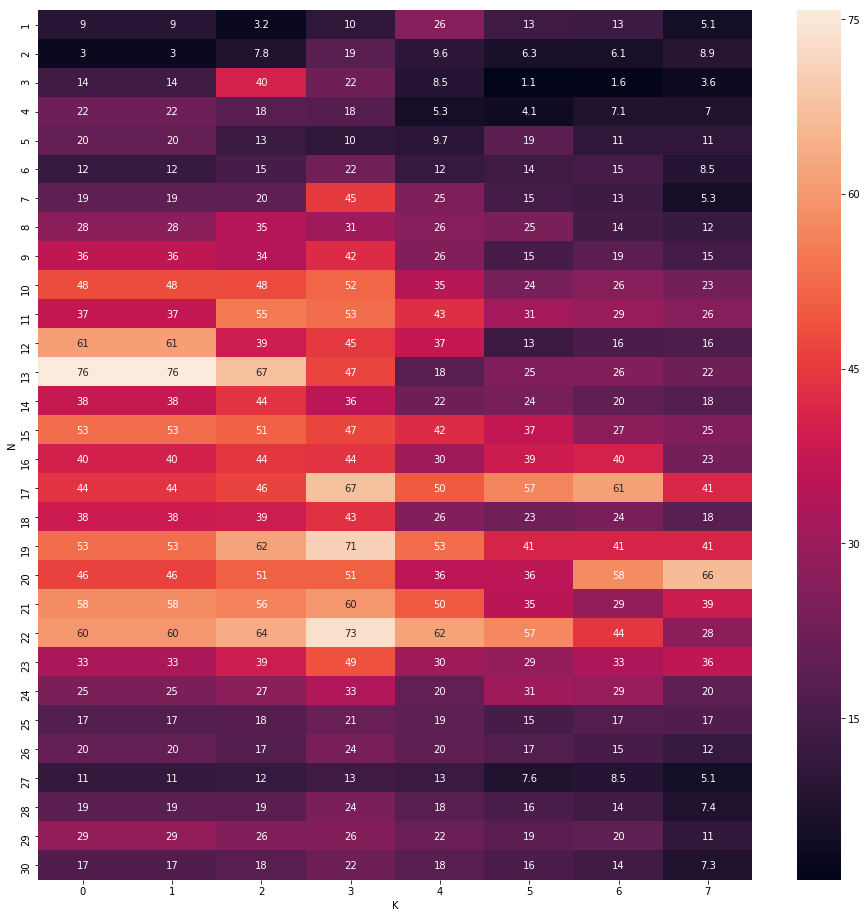

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-2005-2019-20190522.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

# RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-TT-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-MA-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-TT-PARAMTEST-20190306.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-MA-PARAMTEST-20190307.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

# md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN'] > md]
df[df['RETURN'] > df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)